In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def render_env(env):
    state_img = env.render()
    plt.imshow(state_img)
    plt.show()

In [3]:
def render_env_with_grid(env):
    
    state_img = env.render()
    plt.figure(figsize=(3,3))
    plt.imshow(state_img)
    
    # Add grid lines
    grid_size = state_img.shape[0]
    plt.xticks(np.arange(-0.5, grid_size, 1), [])
    plt.yticks(np.arange(-0.5, grid_size, 1), [])
    plt.grid(color='black', linestyle='-', linewidth=1)
    
    # Ensure grid lines are drawn on top
    # plt.gca().set_xticks(np.arange(0, grid_size, 1), minor=True)
    # plt.gca().set_yticks(np.arange(0, grid_size, 1), minor=True)
    # plt.gca().grid(which='minor', color='black', linestyle='-', linewidth=1)
    
    plt.show()

### Creating and initializing the environment

In [4]:
env = gym.make('FrozenLake-v1', render_mode='rgb_array', is_slippery=True)
state, info = env.reset(seed=42)
print(state)

0


#### Action and state spaces
+ actions are stored in env.action_space with its length by env.action_space.n
+ states are stored in env.observation_space with its length by env.observation_space.n
+ state transition matrix is stored in env.unwrapped.P as a dictionary
  + each item corresponds to a specific state-action combination
  + env.unwrapped.P\[1\]\[0\] stores the transition at state 1 and take action 0
     + probability of the transition
     + next state
     + reward
     + is terminated or not

In [5]:
print(f"action space: {env.action_space}")
print(f"observation space: {env.observation_space}")
print(f"number of actions: {env.action_space.n}")
print(f"number of states: {env.observation_space.n}")

action space: Discrete(4)
observation space: Discrete(16)
number of actions: 4
number of states: 16


In [6]:
transitions = env.unwrapped.P
transitions[1][0]

[(0.33333333333333337, 1, 0, False),
 (0.3333333333333333, 0, 0, False),
 (0.33333333333333337, 5, 0, True)]

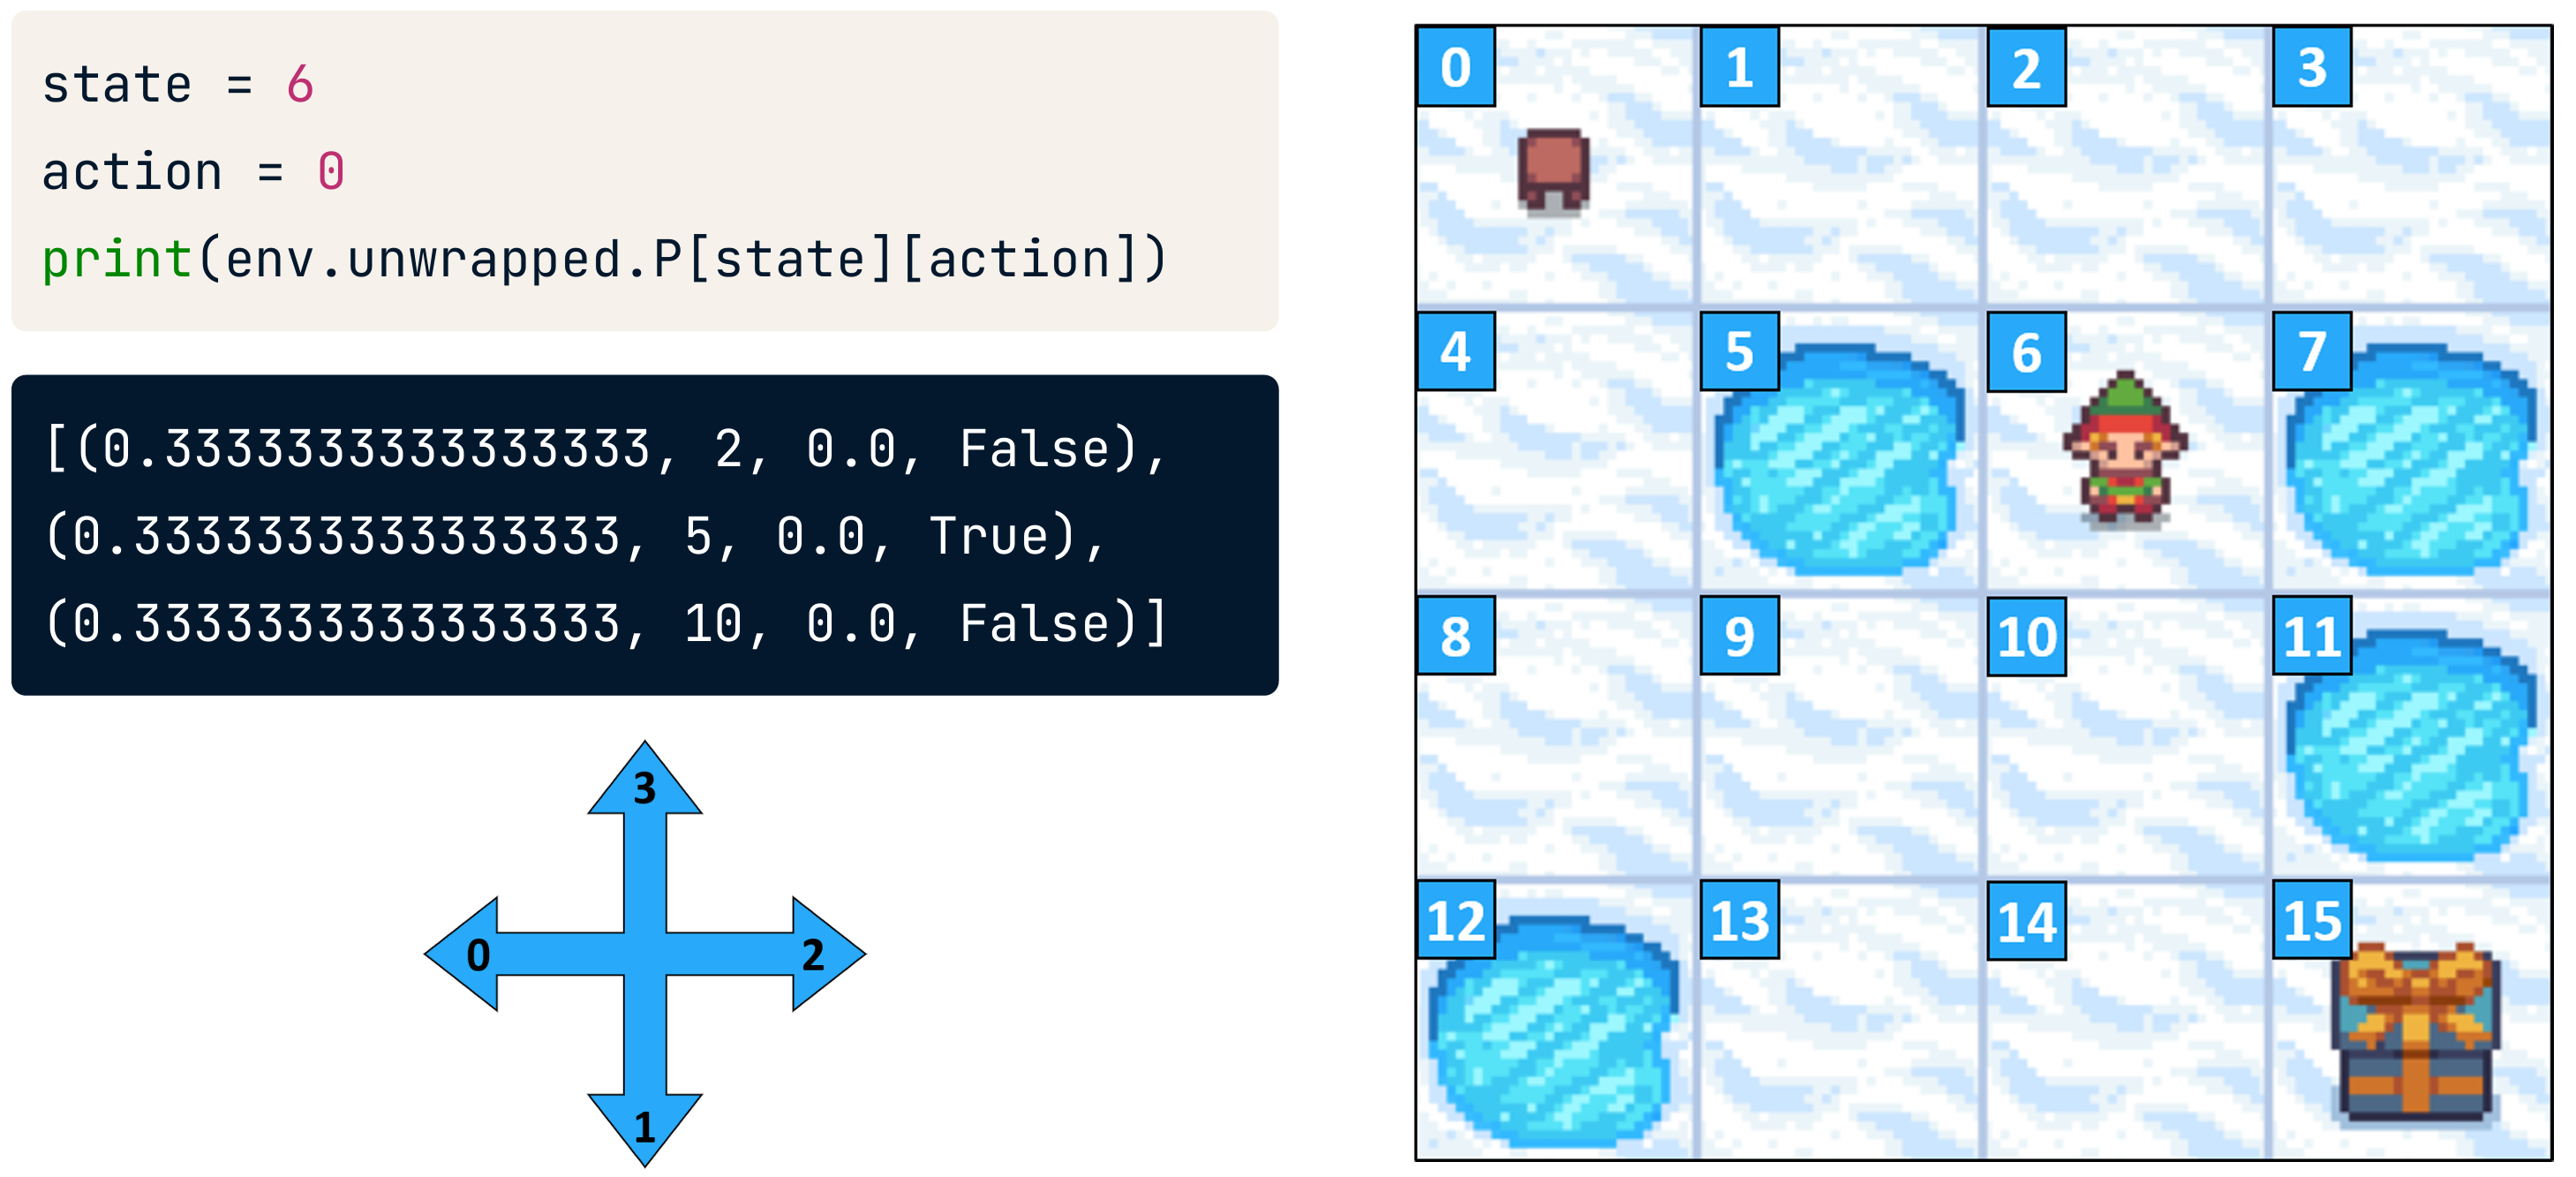

C:\Users\huang\anaconda3\envs\RL\lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


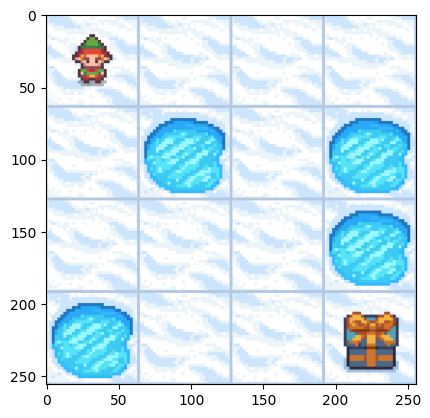

In [7]:
render_env(env)

### Operations
+ define actions of move left, down, right and up corresponding to 0, 1, 2, 3
+ take the action by env.step, which returns
  + next state
  + reward
  + terminated status
  + truncated status
  + info

next_state, 4
reward=0
terminated=False
truncated=False
info={'prob': 0.3333333333333333}


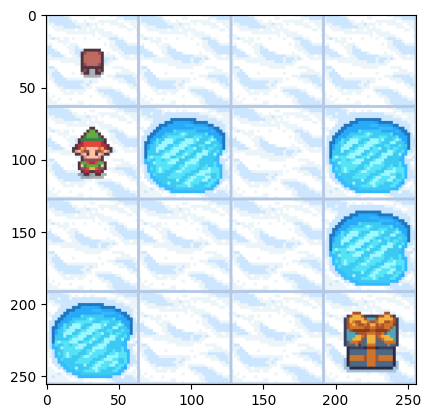

In [8]:
action = 1 # move right
next_state, reward, terminated, truncated, info = env.step(action)
print(f"next_state, {next_state}")
print(f"reward={reward}")
print(f"terminated={terminated}")
print(f"truncated={truncated}")
print(f"info={info}")
render_env(env)

## RL algorithms

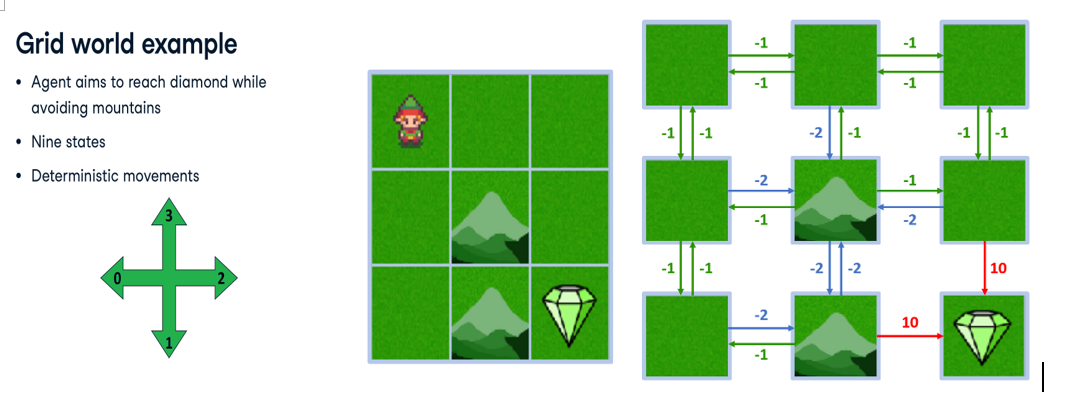

In [9]:
# register the MyGridWorld-v0 environment
from gymnasium.envs.registration import register

register(
    id="MyGridWorld-v0",
    entry_point="my_gridworld_env:MyGridWorld", 
)# module_name:class_name

In [10]:
env = gym.make("MyGridWorld-v0", render_mode="rgb_array")
num_states = env.observation_space.n
num_actions = env.action_space.n
print(f"num_states = {num_states}")
print(f"num_actions = {num_actions}")

num_states = 9
num_actions = 4


In [11]:
state, info = env.reset()

In [12]:
state

0

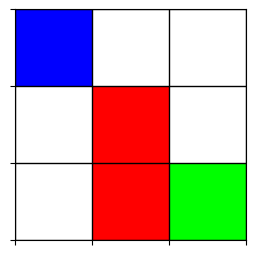

In [13]:
render_env_with_grid(env)

#### Implement a policy

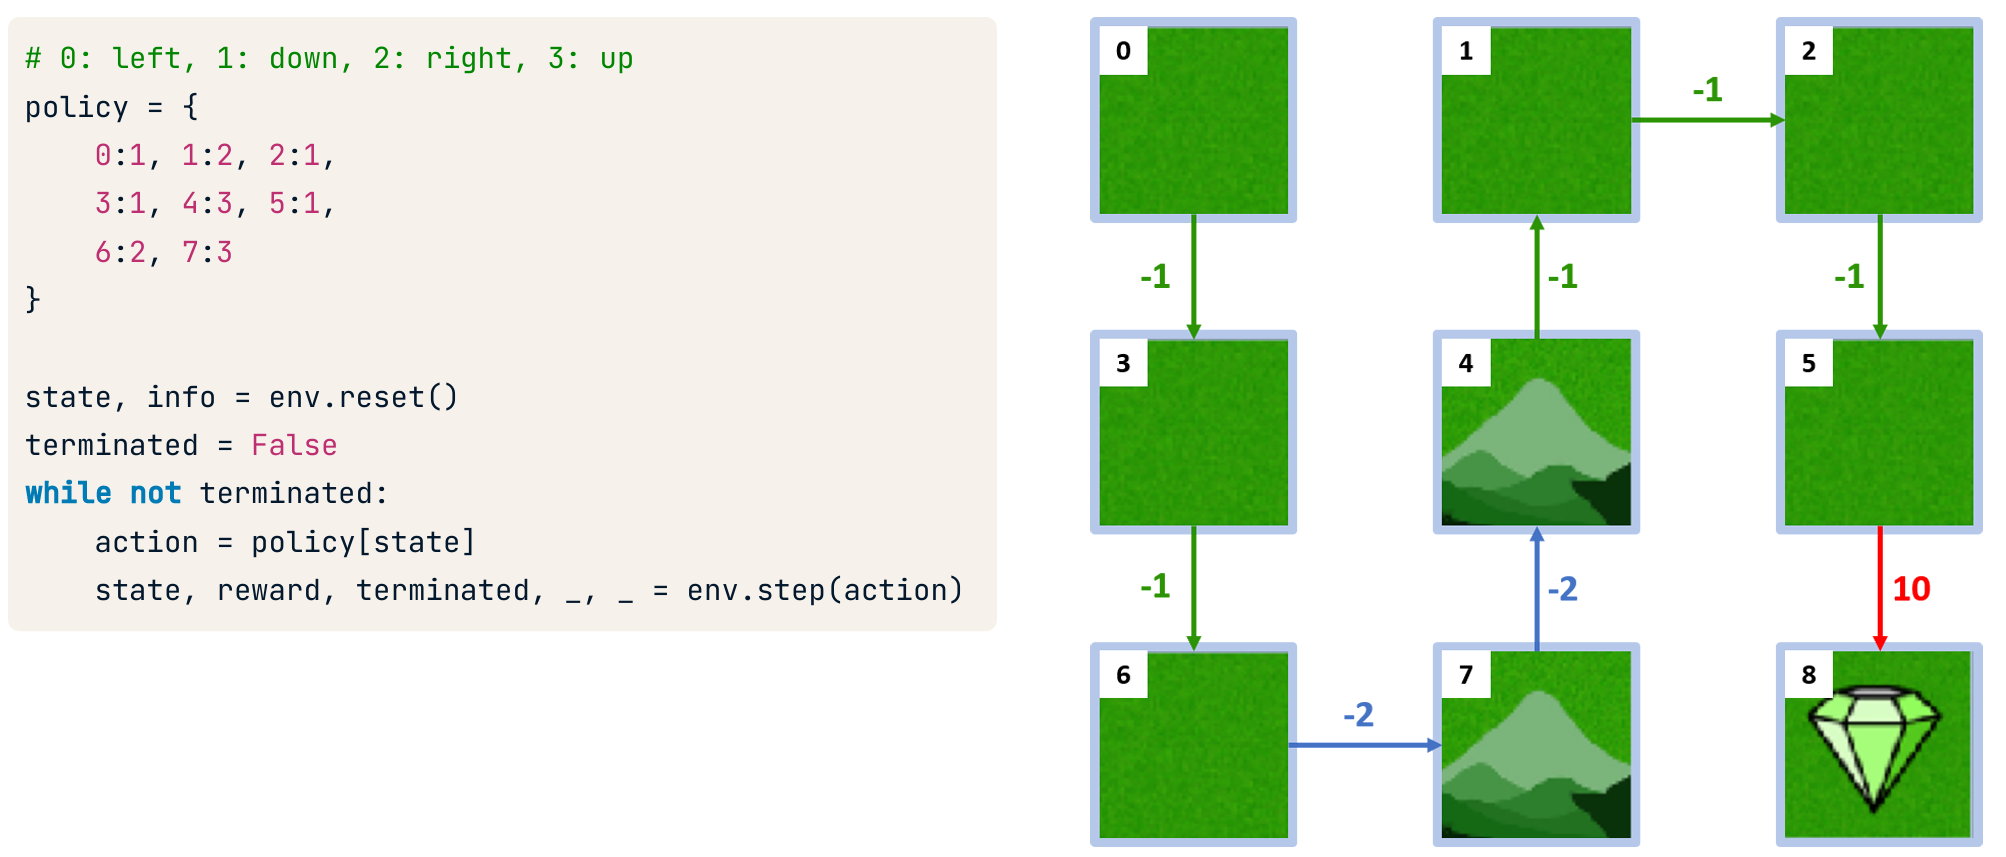

#### Operate on one episode following the policy

In [14]:
policy = {
    0:1, 1:2, 2:1,
    3:1, 4:3, 5:1,
    6:2, 7:3
}

state, info = env.reset()
terminated = False
while not terminated:
    print(state)
    action = policy[state]
    state, reward, terminated, _, _ = env.step(action)

0
3
6
7
4
1
2
5


#### Calculate the state value
+ state value is calcuated based on
  + a policy that defines the path from start to target states
  + the discounted reward for each state transition along the path from start to target states (r(start+1) till r(target))
  + gamma defines how much the reward is discounted based on the distance of the state from the current state
  + for convenience, we usually define a P dictionary that store the prob, reward, next_state, terminated information for each state transition from a start state with an action.
    + all state transition information has been implemented in step() function. Here the information is summarized in P dictionary for easier retrieval
    + once the P dictionary (defined as self.P in \_\_init\_\_()), we can retrieve it by env.unwrapped.P
+ The algorithm is based on:
  + if the state is target, return 0
  + otherwise
    + find the action based on the policy
    + find the next state and reward from  env.unwrapped.P\[state\]\[action\]\[0\]
    + return the reward plus the discounted state value of the next state by recursively calling the state value function on the next state            

In [15]:
env.unwrapped.P

{0: {0: [(1.0, 0, -1, False)],
  1: [(1.0, 3, -1, False)],
  2: [(1.0, 1, -1, False)],
  3: [(1.0, 0, -1, False)]},
 1: {0: [(1.0, 0, -1, False)],
  1: [(1.0, 4, -2, False)],
  2: [(1.0, 2, -1, False)],
  3: [(1.0, 1, -1, False)]},
 2: {0: [(1.0, 1, -1, False)],
  1: [(1.0, 5, -1, False)],
  2: [(1.0, 2, -1, False)],
  3: [(1.0, 2, -1, False)]},
 3: {0: [(1.0, 3, -1, False)],
  1: [(1.0, 6, -1, False)],
  2: [(1.0, 4, -2, False)],
  3: [(1.0, 0, -1, False)]},
 4: {0: [(1.0, 3, -1, False)],
  1: [(1.0, 7, -2, False)],
  2: [(1.0, 5, -1, False)],
  3: [(1.0, 1, -1, False)]},
 5: {0: [(1.0, 4, -2, False)],
  1: [(1.0, 8, 10, True)],
  2: [(1.0, 5, -1, False)],
  3: [(1.0, 2, -1, False)]},
 6: {0: [(1.0, 6, -1, False)],
  1: [(1.0, 6, -1, False)],
  2: [(1.0, 7, -2, False)],
  3: [(1.0, 3, -1, False)]},
 7: {0: [(1.0, 6, -1, False)],
  1: [(1.0, 7, -2, False)],
  2: [(1.0, 8, 10, True)],
  3: [(1.0, 4, -2, False)]},
 8: {0: [(1.0, 7, -2, False)],
  1: [(1.0, 8, -1, True)],
  2: [(1.0, 8, -

In [16]:
env.unwrapped.target

8

In [17]:
# calculate value for each state
def compute_state_values(env, policy: dict, gamma: float = 1.0) -> dict:
    V = dict()
    target = env.unwrapped.target
    V[target] = 0
    P = env.unwrapped.P
    num_states = env.observation_space.n

    def compute_state_value(state: int) -> int:
        
        if state in V:
            return V[state]

        action = policy[state]
        _, next_state, reward, _ = P[state][action][0]
        value = reward + gamma * compute_state_value(next_state)
        V[state] = value
        return value

    for state in range(num_states):
       compute_state_value(state)
    return { state: V[state] for state in sorted(V.keys())}    
            

In [18]:
policy = {
    0:1, 1:2, 2:1,
    3:1, 4:3, 5:1,
    6:2, 7:3
}
V = compute_state_values(env, policy)
print(V)

{0: 1.0, 1: 8.0, 2: 9.0, 3: 2.0, 4: 7.0, 5: 10.0, 6: 3.0, 7: 5.0, 8: 0}


In [19]:
policy_two = { 
0:2, 1:2, 2:1, 
3:2, 4:2, 5:1, 
6:2, 7:2 
}
V = compute_state_values(env, policy_two)
print(V)

{0: 7.0, 1: 8.0, 2: 9.0, 3: 7.0, 4: 9.0, 5: 10.0, 6: 8.0, 7: 10.0, 8: 0}


In [20]:
def compare_policies(env, policy_1, policy_2):
    V1 = compute_state_values(env, policy_1)
    V2 = compute_state_values(env, policy_2)
    num_states = env.observation_space.n

    if all(V1[state] >= V2[state] for state in range(num_states)):
        print("policy 1 is better than policy 2")
    elif all(V2[state] >= V1[state] for state in range(num_states)): 
        print("policy 2 is better than policy 1")
    else:
        print("one policy is not better than the other")


In [21]:
compare_policies(env, policy, policy_two)

policy 2 is better than policy 1


### Calculate Q-values (Action Values)
* Q-values are used to optimize the existing policy
* in addition to the transition matrix, you need an existing policy to estimate the state values
* by calculating Q values for all the possible actions of a state, we can compare the desirability of each action
* we can then choose the action corresponding to the max Q value for each state
* Q(state, action) = reward + gamma * V(next_state)

In [22]:
def compute_q_values(env, policy, gamma=1) -> tuple[dict, dict]:
    Q = {}
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    
    target = env.unwrapped.target
    P = env.unwrapped.P

    V = compute_state_values(env, policy)

    def compute_q_value(state, action) -> float:
        if state == target:
            return None
        _, next_state, reward, terminated = P[state][action][0]
        return reward + gamma * V[next_state]

    for state in range(num_states):
        for action  in range(num_actions):
            Q[(state, action)] = compute_q_value(state, action)

    return Q, V         
    

In [23]:
policy = {
    0:1, 1:2, 2:1,
    3:1, 4:3, 5:1,
    6:2, 7:3
}
Q, V = compute_q_values(env, policy)

In [24]:
def improve_policy(env, Q) -> None:
    num_states, num_actions = env.observation_space.n, env.action_space.n
    
    improved_policy = {}
    for state in range(env.observation_space.n):
        if state == env.unwrapped.target:
            continue
        next_state = max(range(num_actions), key=lambda action: Q[(state, action)]) 
        improved_policy[state] = next_state  

    return improved_policy    

In [25]:
improved_policy =improve_policy(env, Q)
improved_policy

{0: 2, 1: 2, 2: 1, 3: 2, 4: 2, 5: 1, 6: 2, 7: 2}

In [26]:
def policy_iteration(env, original_policy, gammar=1) -> tuple[dict, dict]:
    policy = original_policy.copy()
    
    while True:
        Q, V = compute_q_values(env, policy, gammar)
        improved_policy = improve_policy(env, Q)
        if policy == improved_policy:
            break
        policy = improved_policy 

    return policy, V   

In [27]:
print(policy)
improved_policy, V = policy_iteration(env, policy)
print(improved_policy)
print(V)

{0: 1, 1: 2, 2: 1, 3: 1, 4: 3, 5: 1, 6: 2, 7: 3}
{0: 2, 1: 2, 2: 1, 3: 1, 4: 2, 5: 1, 6: 2, 7: 2}
{0: 7.0, 1: 8.0, 2: 9.0, 3: 7.0, 4: 9.0, 5: 10.0, 6: 8.0, 7: 10.0, 8: 0}


### Monte Carlo Methods
* Model based learning uses poliy and value iteration
  + relies on knowledge of environment dynamics, such as transition probability and rewards
  + without iteractions with the environment
* Mode free learning
  + doesn't rely on knowledge of environment dynamics
  + relies on agent interacts with environment by taking random actions
  + learns policy through trial and error
  + more suitable for real-world applications

* Monte Carlo Methods
  + model free techniques
  + estimate Q values based on episodes
  + several use cases:
    + within an episode, the same state may be visited multiple times and the same action will have the same award, but different Q values. This is because the Q value is the current reward r, plus the accumulated rewards until the target, which is path dependable. When the process takes different paths, the returned values will be different
    + this is the difference between model-based and model-free methods: in MC methods, we don't use a fixed state value dictionary based on the knowlege of environment dynamics, but rather relying on the interactions with the environment, which takes random actions for each step and therefore, will have different values for the same state, depending on the path it takes to arrive to the target.
    + if there are multiple (state, action) occurances in the same episode, we can either only count the first visit of each episode and then average the first visits from the multiple episode (first visit), or we can average all the same (state, action) across all the episodes to calculate the return values, which is the Q value of that combination

#### Monte Carlo algorithm implementation
* the basic idea is to first generate episodes. Each episode consists of randam actions for each state unitl terminated. The next state, action and reward for each step is stored in episode list
* first_visit_mc(num_episodes)
   + generate num_episodes of episodes, and then return the Q numpy array containing the average of accumulated rewards for each (state, action) combination across all episodes but only counting the first occurance of each (state, action) for each episode
   + only return the average accumulated rewards when occurance of the (state, action) is more than once
* every_visit_mc(num_episodes)
   + generate num_episodes of episodes, and then return the Q numpy array containing the average of accumulated rewards for each (state, action) combination across all episodes and count every occurance of each (state, action) for each episode
   + only return the average accumulated rewards when occurance of the (state, action) is more than once     

In [47]:
def generate_episode(env):
    episode = []
    state, info = env.reset()
    terminated = False
    while not terminated:
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state
    return episode

def first_visit_mc(env, num_episodes):
    num_states, num_actions = env.observation_space.n, env.action_space.n
    Q = np.zeros((num_states, num_actions))
    returns_sum = np.zeros((num_states, num_actions))
    returns_count = np.zeros((num_states, num_actions))

    for i in range(num_episodes):
        episode = generate_episode(env)
        visited_states_actions = set()
        for j, (state, action, reward) in enumerate(episode):
            if (state, action) not in visited_states_actions:
                visited_states_actions.add((state, action))
                # sum all rewards from step j on along this episode path
                returns_sum[state, action] += sum([x[2] for x in episode[j:]])
                returns_count[state, action] += 1

    nonzero_counts = returns_count != 0
    Q[nonzero_counts] = returns_sum[nonzero_counts] / returns_count[nonzero_counts]
    return Q

def every_visit_mc(env, num_episodes):
    num_states, num_actions = env.observation_space.n, env.action_space.n
    Q = np.zeros((num_states, num_actions))
    returns_sum = np.zeros((num_states, num_actions))
    returns_count = np.zeros((num_states, num_actions))

    for i in range(num_episodes):
        episode = generate_episode(env)
        
        for j, (state, action, reward) in enumerate(episode): 
            # sum all rewards from step j on along this episode path
            returns_sum[state, action] += sum([x[2] for x in episode[j:]])
            returns_count[state, action] += 1

    nonzero_counts = returns_count != 0
    Q[nonzero_counts] = returns_sum[nonzero_counts] / returns_count[nonzero_counts]
    return Q 


def _get_policy(env, Q):
    num_states = env.observation_space.n
    policy = {state: int(np.argmax(Q[state])) for state in range(num_states)}
    return policy 

def get_policy(env, num_episodes, policy_name):
    if policy_name == "first_visit_policy":
        Q = first_visit_mc(env, num_episodes)
        return _get_policy(env, Q)
    elif policy_name == "every_visit_policy":
        Q = every_visit_mc(env, num_episodes)
        return _get_policy(env, Q)

In [48]:
from gymnasium.envs.registration import register

register(
    id="MyGridWorldMC-v0",
    entry_point="my_gridworld_env:MyGridWorldMC", 
)# module_name:class_name

C:\Users\huang\anaconda3\envs\RL\lib\site-packages\gymnasium\envs\registration.py:636: UserWarning: WARN: Overriding environment MyGridWorldMC-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [49]:
env = gym.make("MyGridWorldMC-v0", render_mode="rgb_array")
num_states = env.observation_space.n
num_actions = env.action_space.n
print(f"num_states = {num_states}")
print(f"num_actions = {num_actions}")

num_states = 6
num_actions = 4


In [51]:
episode = generate_episode(env)

In [52]:
num_episodes = 1000
first_visit_policy = get_policy(env, num_episodes, "first_visit_policy")
every_visit_policy = get_policy(env, num_episodes, "every_visit_policy")
print(f"first_visit_policy: {first_visit_policy}")
print(f"every_visit_policy: {every_visit_policy}")

first_visit_policy: {0: 2, 1: 2, 2: 1, 3: 2, 4: 2, 5: 0}
every_visit_policy: {0: 2, 1: 2, 2: 1, 3: 2, 4: 2, 5: 0}


### Temporal Difference Learning (TD)
* Model-free
* Estimate Q-table based on interaction
* Update Q-table each step within episode
* Suitable for tasks with long/indefinite episodes

#### SARSA
* TD algorithm
* On-policy method: adjusts strategy based on taken actions
* Update Q-table based on Q(s,a), reward(r), Q(s',a') named SARSA, meaning 'state, action, reward, next state, next action'
* Q(s,a) = (1-alpha) * Q(s,a) + alpha * \[r + gamma * Q(s',a')\]. This equation is applied for each step


In [33]:
def update_q_table(Q, state, action, reward, next_state, next_action, alpha=0.1, gamma=1):
    old_value = Q[state, action]
    next_value = Q[next_state, next_action]
    Q[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_value)

def SARSA(env, num_episodes, alpha=0.1, gamma=1) -> np.ndarray:
    num_actions = env.action_space.n
    num_states = env.observation_space.n

    Q = np.zeros((num_states, num_actions))

    for i in range(num_episodes):
        state, _ = env.reset()
        terminated = False
        action = env.action_space.sample()

        while not terminated:            
            next_state, reward, terminated, _, _ = env.step(action)
            next_action = int(env.action_space.sample())
            update_q_table(Q, state, action, reward, next_state, next_action, alpha, gamma)
            state, action = next_state, next_action
    return Q

def get_policy_SARSA(env, num_episodes, alpha, gamma) -> dict:
    Q = SARSA(env, num_episodes, alpha, gamma)
    return _get_policy(env, Q)

In [34]:
env = gym.make("FrozenLake-v1", is_slippery=False)

alpha = 0.1
gamma = 1
num_episodes = 1000
policy = get_policy_SARSA(env, num_episodes, alpha, gamma)
print(policy)

{0: np.int64(1), 1: np.int64(2), 2: np.int64(1), 3: np.int64(0), 4: np.int64(1), 5: np.int64(0), 6: np.int64(1), 7: np.int64(0), 8: np.int64(2), 9: np.int64(2), 10: np.int64(1), 11: np.int64(0), 12: np.int64(0), 13: np.int64(2), 14: np.int64(2), 15: np.int64(0)}


### Q-learning
* Stand for quality learning
* Model-free technique
* Learns optimal Q-table by interaction
* different from SARSA, we use max potential Q value of the next state to update Q-table
* Q(s,a) = (1 - alpha) * Q(s,a) + alpha * \[r + gamma * max(Q(s', a'))\]
* Process:
  + start from random selection of action for each step, update Q-table, and obtain a random policy 
  + use this policy to select action for each step, update Q-table, and obtain a learned policy
  + collect the rewards for random and learned policies 

In [46]:
def update_q_table(Q, state, action, reward, next_state, alpha=0.1, gamma=1):
    old_value = Q[state, action]
    next_value = max(Q[next_state])
    Q[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_value)

def QLearning(env, num_episodes, policy=None, alpha=0.1, gamma=1) -> tuple[np.ndarray, list]:
    num_actions = env.action_space.n
    num_states = env.observation_space.n

    Q = np.zeros((num_states, num_actions))
    reward_per_episode = []

    for i in range(num_episodes):
        state, _ = env.reset()
        terminated = False
        episode_reward = 0

        while not terminated: 
            action = policy[state] if policy else env.action_space.sample()
            next_state, reward, terminated, _, _ = env.step(action)
            update_q_table(Q, state, action, reward, next_state, alpha, gamma)
            episode_reward += reward
            state = next_state
        reward_per_episode.append(episode_reward)     
    return Q, reward_per_episode

def get_policy_Q(env, num_episodes, policy=None, alpha=0.1, gamma=1) -> tuple[dict, list]:
    Q, reward_per_episode = QLearning(env, num_episodes, policy, alpha, gamma)
    return _get_policy(env, Q), reward_per_episode

np.int64(0)

In [ ]:
random_policy, reward_per_episode_random = get_policy_Q(env, 1000)
learned_policy, reward_per_episode_learned = get_policy_Q(env, 1000, random_policy)

### Advanced Model-free learning
#### Expected SARSA
+ based on SARSA, but instead of using Q value of next state and next action pair, use the expected value of the next state
+ Q(s,a) = (1 - alpha) * Q(s,a) + alpha * (r + gamma * E\[Q\[s'\]\])
+ E\[Q\[s'\]\] = sum(prob(a) * Q(s',a) for a in env.action_space)
+ The following implementation use the average value of Q\[next_state\] by assuming all actions have the same probability. You can also consider it as a random action selection process

In [56]:
def update_q_table(Q, state, action, reward, next_state, alpha=0.1, gamma=1):
    old_value = Q[state, action]
    next_value = np.mean(Q[next_state])
    Q[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_value)

def SARSA_Expect(env, num_episodes, policy=None, alpha=0.1, gamma=1) -> tuple[np.ndarray, list]:
    num_actions = env.action_space.n
    num_states = env.observation_space.n

    Q = np.zeros((num_states, num_actions))
    reward_per_episode = []

    for i in range(num_episodes):
        state, _ = env.reset()
        terminated = False
        episode_reward = 0

        while not terminated: 
            action = policy[state] if policy else env.action_space.sample()
            next_state, reward, terminated, _, _ = env.step(action)
            update_q_table(Q, state, action, reward, next_state, alpha, gamma)
            episode_reward += reward
            state = next_state
        reward_per_episode.append(episode_reward)     
    return Q, reward_per_episode

def get_policy_SARSA_Expect(env, num_episodes, policy=None, alpha=0.1, gamma=1) -> tuple[dict, list]:
    Q, reward_per_episode = SARSA_Expect(env, num_episodes, policy, alpha, gamma)
    return _get_policy(env, Q), reward_per_episode

In [57]:
random_policy, reward_per_episode_random = get_policy_SARSA_Expect(env, 1000)
learned_policy, reward_per_episode_learned = get_policy_SARSA_Expect(env, 1000, random_policy)

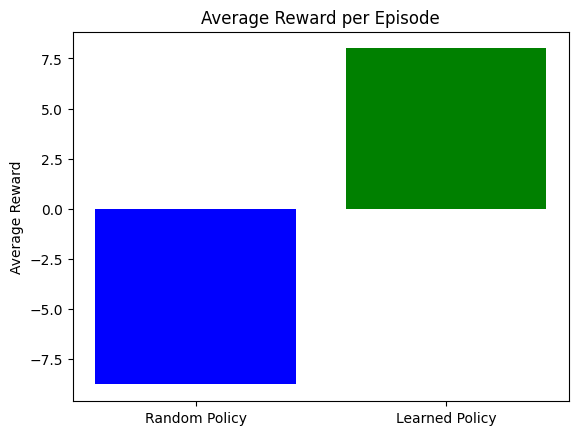

In [58]:
avg_random_reward = np.mean(reward_per_episode_random)
avg_learned_reward = np.mean(reward_per_episode_learned) 
plt.bar(['Random Policy', 'Learned Policy'], 
[avg_random_reward, avg_learned_reward], 
color=['blue', 'green']) 
plt.title('Average Reward per Episode') 
plt.ylabel('Average Reward') 
plt.show()

#### Double Q-learning
+ Q-learning
   + Estimates optimal action-value function
   + Overestimates Q-values by updating based on max Q
   + Might lead to suboptimal policy learning
+ Double Q-learning
  + maintains two Q-tables
  + each table updated based on the other
  + reduces risk of Q-values overestimation
  + each iteration step will randomly update one of the two tables
  + for each table, update the value based on the state of its own table with next state value from the other table by using the max(s', a) combination of its own table
    + Q0(s,a) = (1 - alpha) * Q0(s,a) + alpha * (r + gamma * Q1(max,a(Q0(s',a)))
    + Q1(s,a) = (1 - alpha) * Q1(s,a) + alpha * (r + gamma * Q0(max,a(Q1(s',a)))
  + alternates between Q0 and Q1 updates
  + Both tables contribute to learning process

In [74]:
def update_q_tables(Q, state, action, reward, next_state, alpha=0.1, gamma=1):
    i = np.random.randint(2)
    best_action = np.argmax(Q[i][next_state])
    Q[i][state, action] = (1 - alpha) * Q[i][state, action] + alpha * (reward + gamma * Q[1-i][next_state, best_action])
    

def double_Q(env, num_episodes, policy=None, alpha=0.1, gamma=1) -> tuple[np.ndarray, list]:
    num_actions = env.action_space.n
    num_states = env.observation_space.n

    Q = [np.zeros((num_states, num_actions))] * 2
    reward_per_episode = []

    for i in range(num_episodes):
        state, _ = env.reset()
        terminated = False
        episode_reward = 0

        while not terminated: 
            action = env.action_space.sample()
            next_state, reward, terminated, _, _ = env.step(action)
            update_q_tables(Q, state, action, reward, next_state, alpha, gamma)
            episode_reward += reward
            state = next_state
        reward_per_episode.append(episode_reward)     
    return Q[0] + Q[1], reward_per_episode  

def get_policy_double_Q(env, num_episodes, policy, alpha=0.1, gamma=1) -> tuple[dict, list]:
    Q, reward_per_episode = double_Q(env, num_episodes, policy, alpha, gamma)
    return _get_policy(env, Q), reward_per_episode

In [75]:
env = gym.make('FrozenLake-v1', is_slippery=False)
num_episodes = 1000
alpha = 0.5
gamma = 0.99
policy, reward_per_episode = get_policy_double_Q(env, num_episodes, None, alpha, gamma)

In [76]:
policy

{0: 1,
 1: 2,
 2: 1,
 3: 0,
 4: 1,
 5: 0,
 6: 1,
 7: 0,
 8: 2,
 9: 1,
 10: 1,
 11: 0,
 12: 0,
 13: 2,
 14: 2,
 15: 0}

### Exploration and exploitation trade-off
+ Balances exploration and exploitation
+ Continuous exploration prevents strategy refinement
+ Exclusive exploitation misses undiscovered opportunities

#### Epsilon-greedy strategy
+ Explore with probability epsilon
+ Exploit with probability 1-epsilon
+ Ensures continuous exploration while using knowledge

#### Decayed epsilon-greedy strategy
+ reduces epsilon over time
+ more exploitation later on
+ agent increasingly relies on its accumulated knowledge

In [78]:
def get_action_epsilon_greedy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        action = env.action_space.sample() # explore
    else:
        action = np.argmax(Q[state, :]) # exploit
    return action    

def update_q_table(Q, state, action, reward, next_state, alpha=0.1, gamma=1):
    old_value = Q[state, action]
    next_value = max(Q[next_state])
    Q[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_value)
    
def epsilon_greedy(env, num_episodes, epsilon = 0.9, alpha=0.1, gamma=1) -> tuple[np.ndarray, list]:
    num_actions = env.action_space.n
    num_states = env.observation_space.n

    Q = np.zeros((num_states, num_actions))
    reward_per_episode = []

    for i in range(num_episodes):
        state, _ = env.reset()
        terminated = False
        episode_reward = 0

        while not terminated: 
            action = get_action_epsilon_greedy(Q, state, epsilon)
            next_state, reward, terminated, _, _ = env.step(action)
            update_q_table(Q, state, action, reward, next_state, alpha, gamma)
            episode_reward += reward
            state = next_state
        reward_per_episode.append(episode_reward)     
    return Q, reward_per_episode

def get_policy_epsilon_greedy(env, num_episodes, epsilon=0.9, alpha=0.1, gamma=1) -> tuple[dict, list]:
    Q, reward_per_episode = epsilon_greedy(env, num_episodes, epsilon, alpha, gamma)
    return _get_policy(env, Q), reward_per_episode    
    

In [80]:
env = gym.make('FrozenLake-v1', is_slippery=True) 
alpha = 0.1 
gamma = 0.99 
total_episodes = 10000 

epsilon = 0.9   # Exploration rate 
policy, reward_epsilon = get_policy_epsilon_greedy(env, 10000, epsilon, alpha, gamma) 

In [81]:
policy

{0: 0,
 1: 3,
 2: 3,
 3: 3,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 3,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 2,
 14: 2,
 15: 0}

In [82]:
def get_action_epsilon_greedy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        action = env.action_space.sample() # explore
    else:
        action = np.argmax(Q[state, :]) # exploit
    return action    

def update_q_table(Q, state, action, reward, next_state, alpha=0.1, gamma=1):
    old_value = Q[state, action]
    next_value = max(Q[next_state])
    Q[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_value)
    
def epsilon_greedy_decay(env, num_episodes, epsilon = 0.9, alpha=0.1, gamma=1, min_ep=0.01, decay=1.0) -> tuple[np.ndarray, list]:
    num_actions = env.action_space.n
    num_states = env.observation_space.n

    Q = np.zeros((num_states, num_actions))
    reward_per_episode = []

    for i in range(num_episodes):
        state, _ = env.reset()
        terminated = False
        episode_reward = 0

        while not terminated: 
            action = get_action_epsilon_greedy(Q, state, epsilon)
            next_state, reward, terminated, _, _ = env.step(action)
            update_q_table(Q, state, action, reward, next_state, alpha, gamma)
            episode_reward += reward
            state = next_state
        reward_per_episode.append(episode_reward)
        epsilon = max(min_epsilon, epsilon * decay)
    return Q, reward_per_episode

def get_policy_epsilon_greedy(env, num_episodes, epsilon=0.9, alpha=0.1, gamma=1, min_eps=0.01, decay=1.0) -> tuple[dict, list]:
    Q, reward_per_episode = epsilon_greedy_decay(env, num_episodes, epsilon, alpha, gamma, min_eps, decay)
    return _get_policy(env, Q), reward_per_episode 

In [84]:
epsilon = 1.0   # Exploration rate 
decay = 0.999 
min_epsilon = 0.01

alpha = 0.1 
gamma = 0.99 
num_episodes = 10000

decay_policy, decay_rewares = get_policy_epsilon_greedy(env, num_episodes, epsilon, alpha, gamma, min_epsilon, decay)

In [85]:
decay_policy

{0: 0,
 1: 3,
 2: 0,
 3: 1,
 4: 0,
 5: 0,
 6: 2,
 7: 0,
 8: 3,
 9: 1,
 10: 1,
 11: 0,
 12: 0,
 13: 2,
 14: 1,
 15: 0}

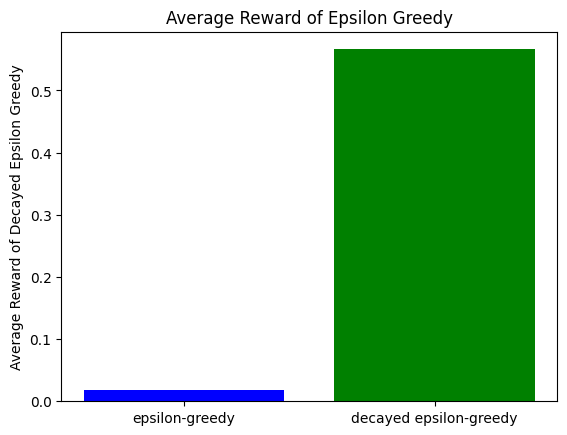

In [86]:
reward_epsilon_avg = np.mean(reward_epsilon)
decay_rewares_avg = np.mean(decay_rewares)

plt.bar(['epsilon-greedy', 'decayed epsilon-greedy'], 
[reward_epsilon_avg, decay_rewares_avg], 
color=['blue', 'green']) 
plt.title('Average Reward of Epsilon Greedy') 
plt.ylabel('Average Reward of Decayed Epsilon Greedy') 
plt.show()

### Multi-armed bandits using decayed epsilon greedy
+ using epsilon as the probability to explore
+ using 1-epsilon probability to exploit
+ epsilon decays over time
#### Set up multi-armed bandits

In [95]:
import random
n_bandits = 4   
true_bandit_probs = np.random.rand(n_bandits) # generate the truth winning prob for each bandit
n_iterations = 100000 

epsilon = 1.0 
min_epsilon = 0.01 
epsilon_decay = 0.999 

counts = np.zeros(n_bandits)  # How many times each bandit was played 
values = np.zeros(n_bandits)  # Estimated winning probability of each bandit 
rewards = np.zeros(n_iterations)  # Reward history 
selected_arms = np.zeros(n_iterations, dtype=int)  # Arm selection history 

def get_arm_epsilon_greedy(n_bandit, values, epsilon):
    if np.random.rand() < epsilon:
        arm = random.sample(range(n_bandits), 1)[0] # explore
    else:
        arm = np.argmax(values) # exploit
    return arm
    
for i in range(n_iterations):
    arm = get_arm_epsilon_greedy(n_bandits, values, epsilon)
    reward = np.random.rand() < true_bandit_probs[arm]
    rewards[i] = reward
    selected_arms[i] = arm
    counts[arm] += 1
    values[arm] += (reward - values[arm]) /counts[arm]
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

In [96]:
values

array([0.22553191, 0.99852959, 0.79642058, 0.60084926])

In [97]:
true_bandit_probs

array([0.23397339, 0.99860118, 0.77725026, 0.58865779])

#### Analyzing selections
+ create a two dimension np array to store the selected arm for each iteration.
  + selections_percentage has dimension of (num_iterations, num_bandits)
  + it stores the selected arms for each iteration by set its value as 1 and all others as 0
  + then accumulate the selected arms for each iteration by np.cumsum(selections_percentage, axis =0)
  + then divide the obtained selections_percentage by np.arange(1, n_iterations + 1).reshape(-1, 1)

In [98]:
selections_percentage = np.zeros((n_iterations, n_bandits)) 

for i in range(n_iterations): 
    selections_percentage[i, selected_arms[i]] = 1 
selections_percentage = np.cumsum(selections_percentage, axis=0)
selections_percentage /= np.arange(1, n_iterations + 1).reshape(-1, 1)

In [99]:
selections_percentage

array([[1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ],
       [0.66666667, 0.33333333, 0.        , 0.        ],
       ...,
       [0.00470009, 0.98611972, 0.00447009, 0.00471009],
       [0.00470005, 0.98611986, 0.00447004, 0.00471005],
       [0.0047    , 0.98612   , 0.00447   , 0.00471   ]])

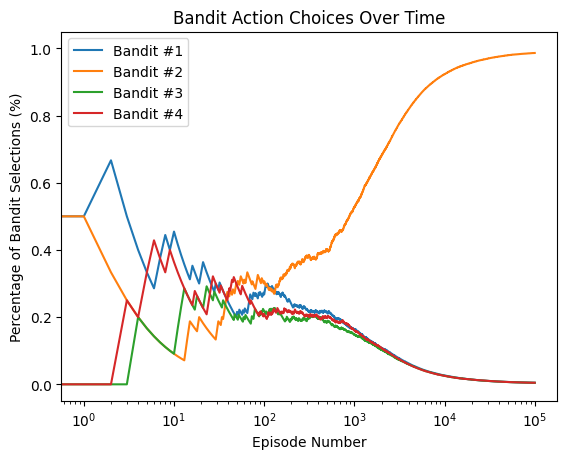

Bandit #1 -> 0.23
Bandit #2 -> 1.00
Bandit #3 -> 0.78
Bandit #4 -> 0.59


In [102]:
for arm in range(n_bandits): 
    plt.plot(selections_percentage[:, arm], label=f'Bandit #{arm+1}')
plt.xscale('log') 
plt.title('Bandit Action Choices Over Time') 
plt.xlabel('Episode Number') 
plt.ylabel('Percentage of Bandit Selections (%)') 
plt.legend()
plt.show()  
for i, prob in enumerate(true_bandit_probs, 1):
    print(f"Bandit #{i} -> {prob:.2f}") 
 